# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np


In [2]:
# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = study_results.merge(mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.study_results
complete_data.groupby('Mouse ID')['Timepoint'].count()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_data['Mouse ID'].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df2 = complete_data[complete_data.duplicated('Mouse ID')]
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropcomplete_data = complete_data.drop_duplicates(subset=['Mouse ID'], ignore_index=True)
dropcomplete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
dropcomplete_data['Mouse ID'].count()

249

In [8]:
complete_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].mean()
median_tumor = complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].median()
varince_tumor = complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].var()
std_tumor = complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].std()
SEM_tumor = complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].sem()

#complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].describe()
#mean, median, variance, std_dev, sem = complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].mean(), complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].median(), complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].var(),complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].std(), complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].sem()
#print("Mean:")
#print(mean)
#print("\nMedian:")
#print(median)
#print("\nVariance:")
#print(variance)
#print("\nStandard Deviation:")
#print(std_dev)
#print("\nSEM:")
#print(sem)
summary_statics = pd.DataFrame({
    #'Drug Regimen' : mean_tumor.index,
    'Mean Tumor Volume' : mean_tumor['Tumor Volume (mm3)'],
    'Median Tumor Volume' : median_tumor['Tumor Volume (mm3)'],
    'Tumor Volume Variance' : varince_tumor['Tumor Volume (mm3)'],
    'Tumor Volume Std. Dev.' : std_tumor['Tumor Volume (mm3)'],
    'Tumor Volume Std. Err.' : SEM_tumor['Tumor Volume (mm3)']
})
summary_statics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
#labels = Drug_Regimen['Drug Regimen']
plotdf = complete_data.groupby(['Drug Regimen'])[["Mouse ID"]].count()
plotdf = plotdf.sort_values('Mouse ID', ascending = False)
labels = complete_data.groupby(['Drug Regimen'])[["Mouse ID"]].count()
labels = plotdf.index
y_values = complete_data.groupby(['Drug Regimen'])[["Mouse ID"]].count()
y_values = plotdf['Mouse ID']
labels
#y_values = dropcomplete_data.groupby(['Drug Regimen'], as_index=False)[["Timepoint"]].value_counts()
#.sum()['Mouse ID']['Timepoint']'Drug Regimen'
#y_values    

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object', name='Drug Regimen')

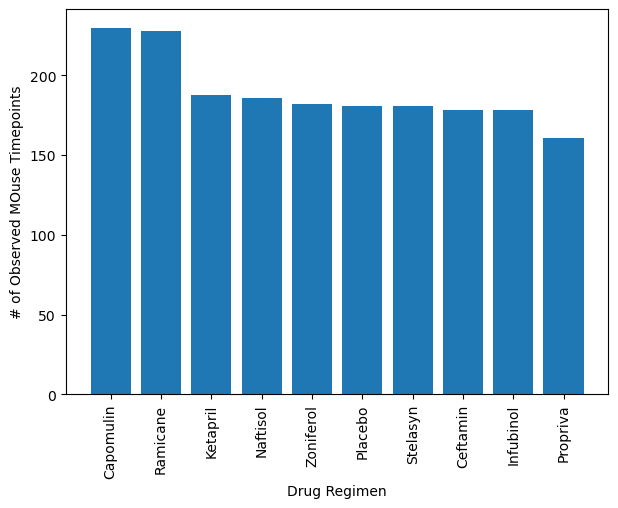

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.figure(figsize=[7,5])
plt.bar(labels, y_values)
plt.xticks(rotation='vertical')
plt.ylabel('# of Observed MOuse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

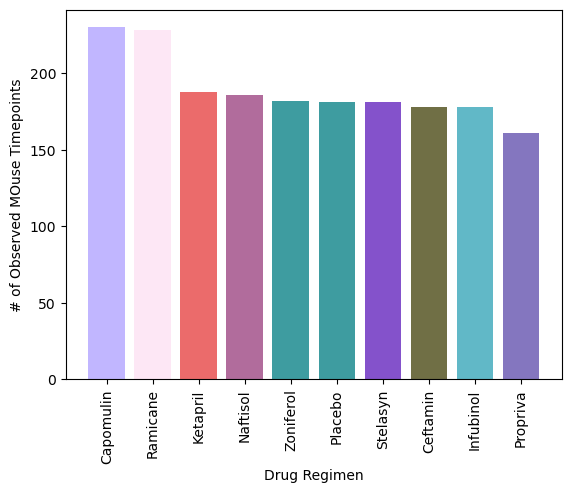

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
barplot = plt.bar(
    labels, y_values, 
    color=['#B2A4FF','#FDE2F3', '#E74646','#9E4784','#0E8388','#0E8388','#6527BE','#4C4B16','#3AA6B9', '#6554AF'], 
    alpha=0.8)
plt.xticks(rotation='vertical')
plt.ylabel('# of Observed MOuse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

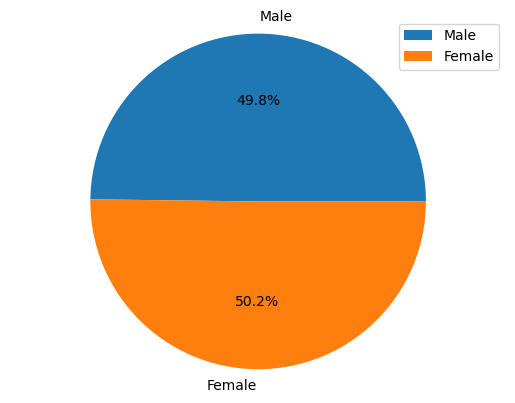

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plotdf = dropcomplete_data["Sex"].value_counts()
plotfem = (plotdf['Female'])*100/249
plotmasc = (plotdf['Male'])*100/249
plotmasc
frame = {'labels': plotdf.index,
        'sex': [plotfem,plotmasc]}
df = pd.DataFrame(frame)
df.plot(kind='pie', y='sex', labels=df['labels'], autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('') 
plt.show()


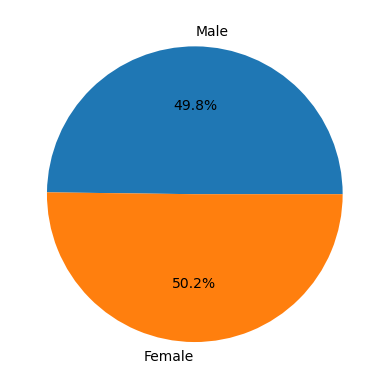

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df['sex'], labels = df['labels'], autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#complete_data.loc[complete_data['Drug Regimen'] == 45].count()
#---------------------------------------------
#df_students[(df_students['math_score']>=70) & (df_students['reading_score'] >=70)]
#ninth_math = Schools_grades_math.loc[Schools_grades_math['grade'] == "9th"]

#  Start by getting the last (greatest) timepoint for each mouse
#------------------------------------------------------------------------------------------
#complete_data.loc[complete_data['Drug Regimen'] == 'Capomulin']
Greatest_time = complete_data.loc[complete_data['Timepoint'] >= 0]
#Greatest_time = Greatest_time.drop_duplicates(subset=['Mouse ID'], ignore_index=True)
Greatest_time = Greatest_time.sort_values('Timepoint', ascending=False)
Greatest_time = Greatest_time.drop_duplicates(subset=['Mouse ID'], keep='first')
Final_tumor = Greatest_time.loc[(Greatest_time['Drug Regimen']=='Capomulin')|(Greatest_time['Drug Regimen']=='Ramicane')|(Greatest_time['Drug Regimen']=='Infubinol')|(Greatest_time['Drug Regimen']=='Ceftamin')]
Final_tumor
#groupby(['Drug Regimen','Mouse ID'])[['Timepoint']].sum()
#complete_data_fil = complete_data.groupby(['Drug Regimen','Mouse ID'])[['Timepoint'] <= 45].sum()

#complete_data_fil = complete_data.groupby(['Drug Regimen','Mouse ID'])[['Timepoint'] == 45].sum()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1799,z578,45,30.638696,0,Ramicane,Male,11,16
1800,m957,45,33.329098,1,Capomulin,Female,3,19
1801,e662,45,40.659006,2,Ramicane,Male,8,24
...,...,...,...,...,...,...,...,...
420,c326,5,36.321346,0,Infubinol,Female,18,25
217,x226,0,45.000000,0,Ceftamin,Male,23,28
194,b447,0,45.000000,0,Ceftamin,Male,2,30
222,t573,0,45.000000,0,Ceftamin,Female,15,27


In [17]:

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

## Line and Scatter Plots

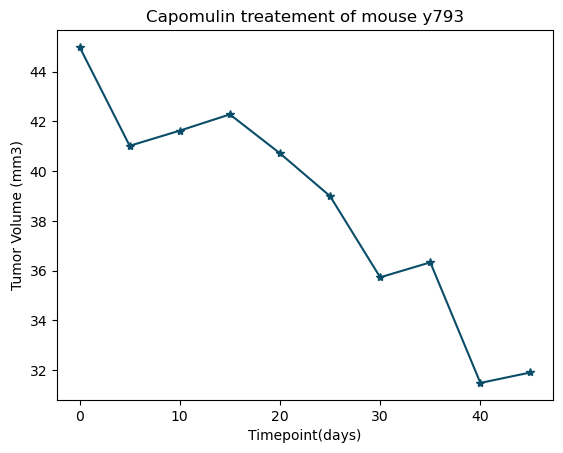

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
maousey793 = complete_data.loc[complete_data['Mouse ID'] == 'y793']

x_axis = maousey793['Timepoint']
y_values = maousey793['Tumor Volume (mm3)']
plt.plot(x_axis,y_values, label='Tumor Volume (mm3)', marker='*', color='#0A4D68')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatement of mouse y793')
plt.show()



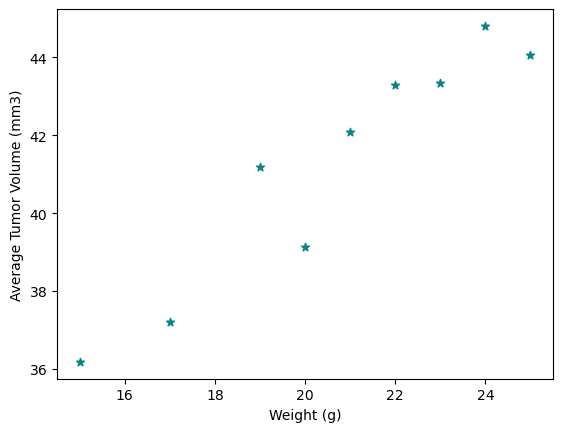

In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin = complete_data.loc[(complete_data['Drug Regimen']=='Capomulin')]
Capomulin1 = Capomulin.groupby(['Weight (g)'])[['Tumor Volume (mm3)']].mean()

x_axis = Capomulin1.index
y_values = Capomulin1['Tumor Volume (mm3)']
plt.scatter(x_axis,y_values, label='Tumor Volume (mm3)', marker='*', color='#0E8388')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#plt.title('Capomulin treatement of mouse y793')
plt.show()

In [70]:
Capomulin1

,Tumor Volume (mm3)
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109


## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
st.pearsonr(x_axis,y_values)



PearsonRResult(statistic=0.950524396185527, pvalue=8.44945104064623e-05)

In [58]:
Capomulin.corr()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Timepoint,1.000000,-0.584271,0.584006,-0.057964,-0.035271
Tumor Volume (mm3),-0.584271,1.000000,-0.313092,-0.021604,0.525700
Metastatic Sites,0.584006,-0.313092,1.000000,0.006748,-0.119149
Age_months,-0.057964,-0.021604,0.006748,1.000000,-0.169172
Weight (g),-0.035271,0.525700,-0.119149,-0.169172,1.000000


In [60]:
from sklearn.linear_model import LinearRegression


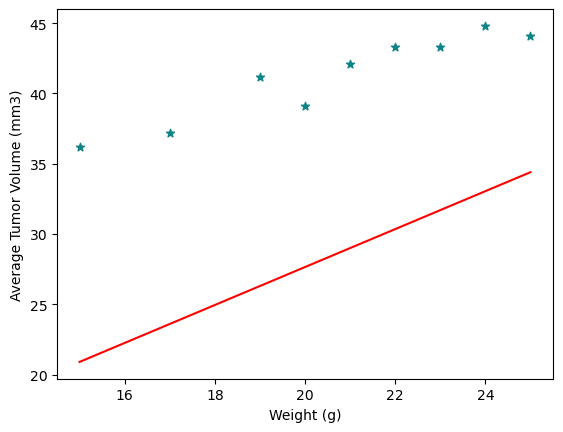

In [75]:
X_line = np.array([[15], [25]])
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', label='Linear Regression Line')
plt.scatter(x_axis,y_values, label='Tumor Volume (mm3)', marker='*', color='#0E8388')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

